### Seaborn Docs

In [206]:
import seaborn as sns
import random
import matplotlib.pylab as plt
%matplotlib inline

In [207]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


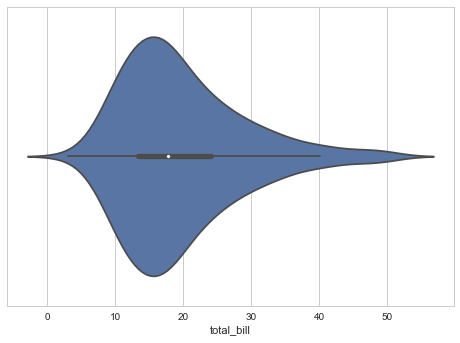

In [208]:
ax = sns.violinplot(x=tips["total_bill"])

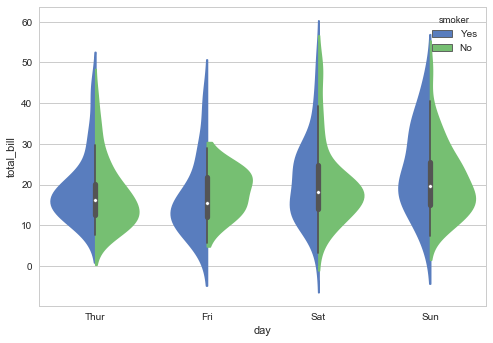

In [209]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",data=tips, palette="muted", split=True)

### Randomly Populated Trade DataFrame (Format Original)

In [210]:
import pandas as pd
import numpy as np
num_trades = 10000
week_days = ["Mon","Tues","Wed","Thurs","Fri"]
d = {"Trade Id"  : list(range(0,num_trades)),
     "A" : np.random.normal(10,2,num_trades),
     "B" : np.random.uniform(5,20,num_trades),
     "C" : np.random.uniform(0,5,num_trades),
     "Error Hit": np.random.choice([0,1],num_trades),
     "Week Day" : np.random.choice(week_days,num_trades)
    }
df_trade = pd.DataFrame(d)
cols = ["Trade Id", "A","B","C","Error Hit","Week Day"]
df_trade = df_trade[cols]
df_trade.head(5)

,Trade Id,A,B,C,Error Hit,Week Day
0,0,9.760715,19.458210,3.708087,1,Wed
1,1,10.310217,5.834604,2.920614,0,Thurs
2,2,11.562914,6.409779,4.277481,0,Mon
3,3,7.184694,6.011300,4.944188,1,Fri
4,4,7.290944,5.302969,1.540080,0,Thurs


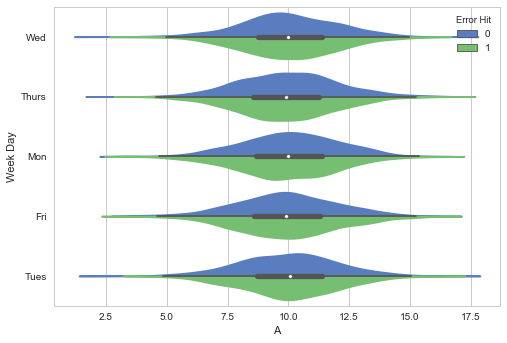

In [211]:
ax = sns.violinplot(y = "Week Day", x = "A", hue="Error Hit", data=df_trade, palette="muted", split=True)

### Randomly Populated Trade DataFrame (Violin plot format)

In [212]:
num_rows = 1000
num_trades = 333 # roughly 3 statuses for each trade
status = ["A","B","C"]
d = {"Trade Id"       : np.random.choice(list(range(0,num_trades)),num_rows),
     "Time in Status" : np.random.uniform(5,20,num_rows),
     "Status"         : np.random.choice(status,num_rows),
    }
df_trade_pivoted = pd.DataFrame(d)
cols = ["Trade Id","Time in Status","Status"]
df_trade_pivoted = df_trade_pivoted[cols]
df_trade_pivoted["Errors"] = df_trade_pivoted["Trade Id"]%2
df_trade_pivoted.sort_values(by=['Trade Id'], inplace = True)
df_trade_pivoted.head(15)

,Trade Id,Time in Status,Status,Errors
33,0,11.331455,B,0
540,0,7.228054,C,0
855,0,16.095527,B,0
46,1,16.586977,B,1
323,2,19.784558,C,0
979,2,13.365605,A,0
447,2,6.820039,C,0
968,3,17.746864,A,1
710,3,11.267341,C,1
225,3,8.412466,B,1


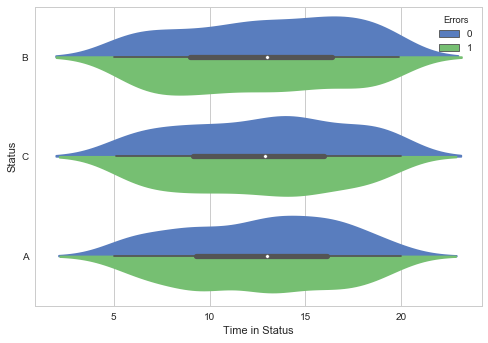

In [213]:
ax = sns.violinplot(y = "Status", x = "Time in Status", hue="Errors", data=df_trade_pivoted, palette="muted", split=True)

### Pivoting from Original Table format to Violin Format

In [214]:
melted = pd.melt(df_trade.drop('Week Day', 1),id_vars=["Trade Id", "Error Hit"], var_name = "Status", value_name="Time (s)")
melted.sort_values(by=['Trade Id'], inplace = True)
melted.head()

,Trade Id,Error Hit,Status,Time (s)
0,0,1,A,9.760715
20000,0,1,C,3.708087
10000,0,1,B,19.458210
1,1,0,A,10.310217
20001,1,0,C,2.920614


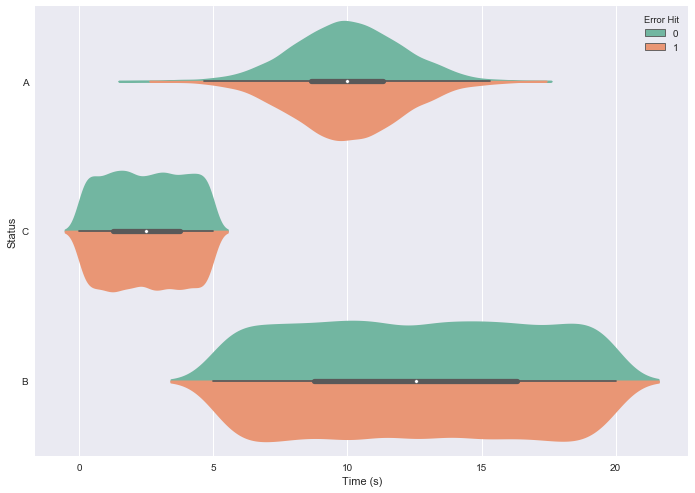

In [215]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(y = "Status", x = "Time (s)", hue="Error Hit", data=melted, palette="Set2", split=True, gridsize=500,)

### Artifically Injecting Longer Times for Errored Trades

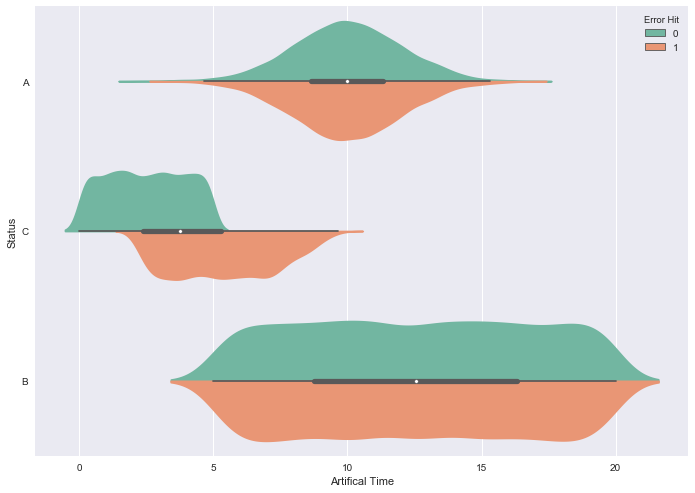

In [216]:
def artificially_inflate_error(row):
    if all([row['Error Hit']==1,row['Status']=="C"]):
        rv = random.uniform(2,2.5) + row['Time (s)'] * random.uniform(1,1.5)
    else:
        rv = row['Time (s)']
    return rv

melted['Artifical Time'] = melted.apply(artificially_inflate_error, axis = 1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(y = "Status", x = "Artifical Time", hue="Error Hit", data=melted, palette="Set2", split=True, gridsize=500,)